# R Workflow, Compliments of the USGS 

#### Source: https://owi.usgs.gov/R/dataRetrieval.html#

USGS on Github: https://github.com/usgs

In [1]:
# Import Libraries
library(dataRetrieval) # USGS API Library
library(ggplot2)       # Plotting Library
library(repr)          # Plotting Library

### Enter Guage ID, start & end dates 

In [2]:
siteNo <- "01513500"        # USGS Gage ID
pCode <- "00060"            # Parameter Code (00060 is Discharge)
start.date <- "2017-05-01"  # Start date 
end.date <- "2017-06-10"    # End date

### Get Data Directly from the USGS API

In [3]:
# Call Function to retrieve data
vestal <- readNWISuv(siteNumbers = siteNo,
                     parameterCd = pCode,
                     startDate = start.date,
                     endDate = end.date)

# Rename columns from code (e.g. 00060 ==> Flow_Inst)
vestal <- renameNWISColumns(vestal) 

# Take a peak at the data
head(vestal) 

agency_cd,site_no,dateTime,Flow_Inst,Flow_Inst_cd,tz_cd
USGS,01513500,2017-05-01 05:00:00,7960,P,UTC
USGS,01513500,2017-05-01 05:15:00,7940,P,UTC
USGS,01513500,2017-05-01 05:30:00,7940,P,UTC
USGS,01513500,2017-05-01 05:45:00,7940,P,UTC
USGS,01513500,2017-05-01 06:00:00,7920,P,UTC
USGS,01513500,2017-05-01 06:15:00,7920,P,UTC


### Plot Data

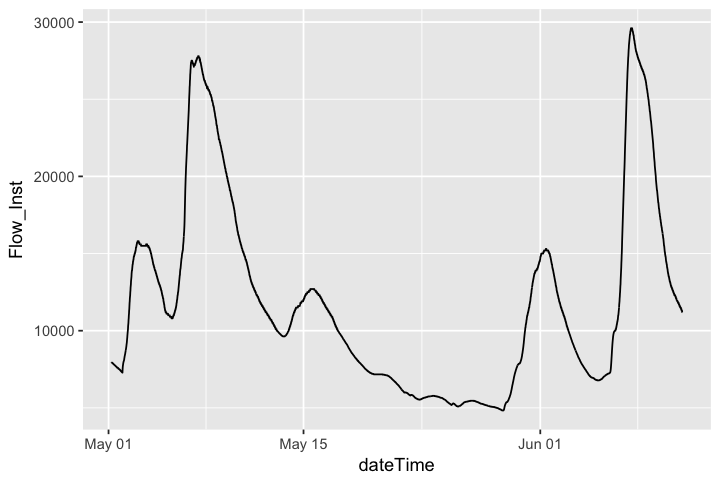

In [4]:
options(repr.plot.width=6,repr.plot.height=4) # Plotting Option for Jupyter

ts <- ggplot(data = vestal,
             aes(dateTime, Flow_Inst)) +
      geom_line()

ts

In [5]:
summary(vestal)

  agency_cd           site_no             dateTime                  
 Length:3936        Length:3936        Min.   :2017-05-01 05:00:00  
 Class :character   Class :character   1st Qu.:2017-05-11 10:56:15  
 Mode  :character   Mode  :character   Median :2017-05-21 16:52:30  
                                       Mean   :2017-05-21 16:52:30  
                                       3rd Qu.:2017-05-31 22:48:45  
                                       Max.   :2017-06-11 04:45:00  
   Flow_Inst     Flow_Inst_cd          tz_cd          
 Min.   : 4830   Length:3936        Length:3936       
 1st Qu.: 7090   Class :character   Class :character  
 Median :10750   Mode  :character   Mode  :character  
 Mean   :11857                                        
 3rd Qu.:14400                                        
 Max.   :29600                                        